# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = pd.read_csv('MetacriticGameReviewsClean.csv', index_col=0)
df.head()

# Change the genre of shoot to shooter
df['genre'] = df.genre.replace('Shoot', 'Shooter')

### Determine the distribution and spread of user scores
***

Text(0, 0.5, 'Percentage')

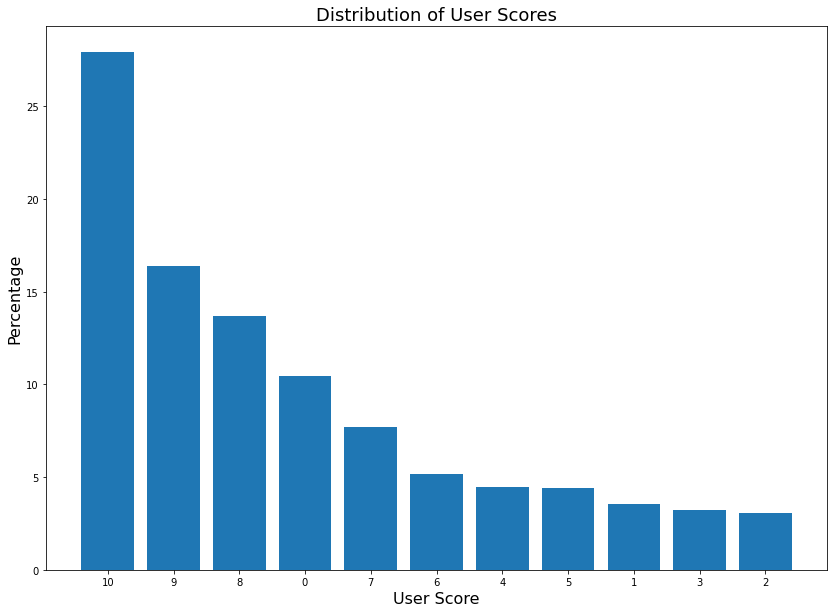

In [2]:
percent_userscore = [round(val*100, 2) for val in df.userscore.value_counts(normalize=True).values]
score = [str(i) for i in df.userscore.value_counts().index]

# Plot the distribution of number of words by user score for each game genre
plt.figure(figsize=(14,10))
plt.bar(x=score, height=percent_userscore)
plt.title('Distribution of User Scores', fontsize=18)
#plt.xticks(label=score)
plt.xlabel('User Score', fontsize=16)
plt.ylabel('Percentage', fontsize=16)

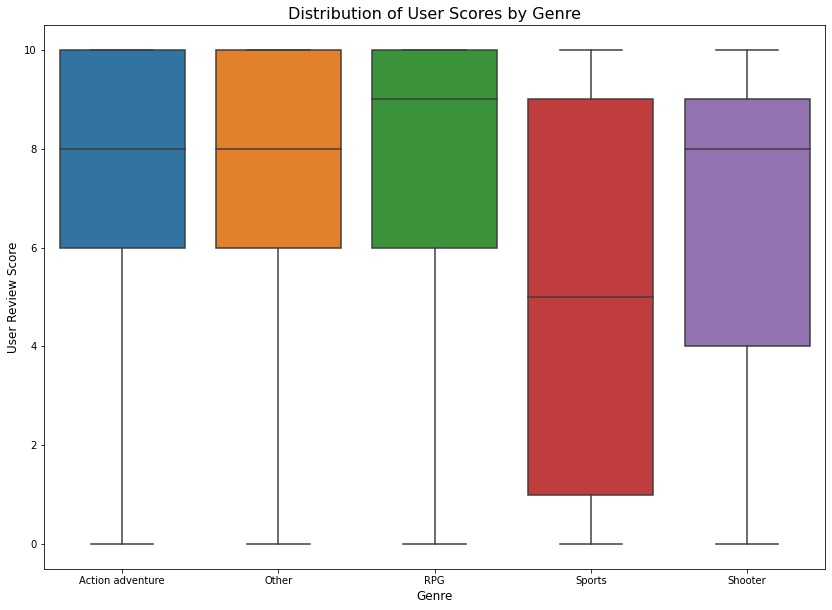

In [3]:
plt.figure(figsize=(14,10))
ax = sns.boxplot(x='genre', y='userscore', data=df, showfliers=False)
ax.set_title('Distribution of User Scores by Genre',  fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('User Review Score', fontsize=12)
plt.show()

***
>Most of the reviews in the dataset were positive accounting for about 57% of the total reviews. A whopping 10% of all reviews received a 0. People tend to enjoy video games released on console or they tend to be easily pleased with the attributes game developers add to their games.<br><br>
> Generally the RPG genre is received the best by gamers. The spread of user scores among action adventure games and games from lesser known genres is indistinguishable. Sport games received the most negative scores among all genres in the dataset.
***

### How are sigleplayer games received by gamers than multiplayer games in each genre?
***

In [4]:
# Initialize a list of the game genres
genres = df.genre.value_counts().index
genres

Index(['Other', 'Action adventure', 'RPG', 'Shooter', 'Sports'], dtype='object')

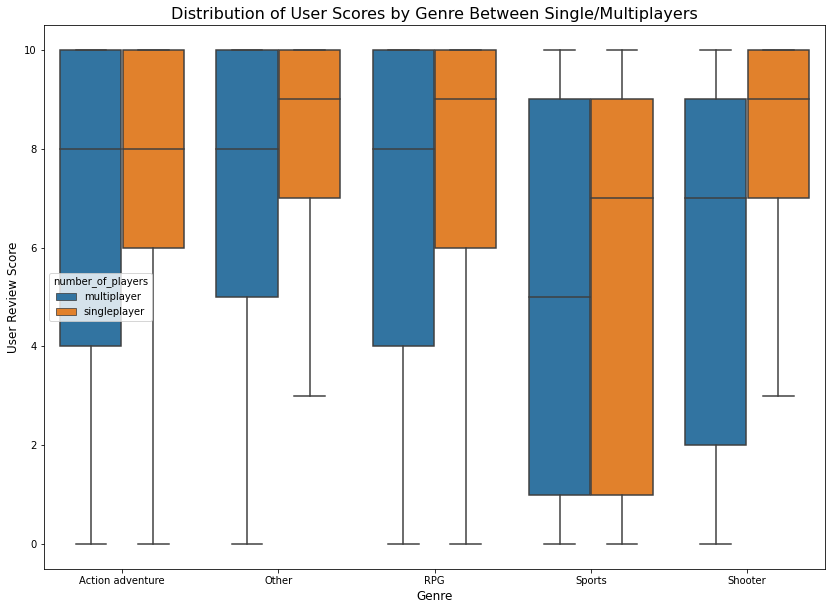

In [5]:
plt.figure(figsize=(14,10))
ax = sns.boxplot(x='genre', y='userscore', hue='number_of_players', data=df, showfliers=False)
ax.set_title('Distribution of User Scores by Genre Between Single/Multiplayers',  fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('User Review Score', fontsize=12)
plt.show()

In [6]:
# Calculate p-values through t-testing to verify whether there is a statistical difference between
# single/multiplayer games and the user's review score by game genre
for genre in genres:
    single = df.loc[df['genre'] == genre, 'userscore'][df.number_of_players == 'singleplayer']
    multi = df.loc[df['genre'] == genre, 'userscore'][df.number_of_players == 'multiplayer']

    stat, p = ss.ttest_ind(single, multi) 
    
    if p < 0.05: # Using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between multi and single player games and user scores in the", genre, "genre.\nP-value:{p}.\n".format(p =p))
    else:
        print("The", genre, "genre is not statistically significant between multi and single player games and user scores.")
        print('P-value:',p,'\n')

There is a statistically significant difference between multi and single player games and user scores in the Other genre.
P-value:1.1532355934745548e-09.

There is a statistically significant difference between multi and single player games and user scores in the Action adventure genre.
P-value:4.720764106915352e-16.

There is a statistically significant difference between multi and single player games and user scores in the RPG genre.
P-value:5.962644605649012e-10.

There is a statistically significant difference between multi and single player games and user scores in the Shooter genre.
P-value:1.7482594476121354e-38.

There is a statistically significant difference between multi and single player games and user scores in the Sports genre.
P-value:0.03868216633581247.



***
> In each game genre there was a statistical difference between muliplayer games versus singleplayer games and the user's review score in game reviews seperated by their game genre. Singleplayer games regardless of genre generally receieved higher review scores than multiplayer games. In the shooter genre, multiplayer games scored significantly lower than multiplayers games than any other genre. This was surprising as many of the popular shooter games boast immersive multiplayer game modes. However, that could be the very reason the multiplayer shooters received lower scores. Onine multiplayer is a place where a lot of trash talking occurs and having a couple of bad games can negatively affect the experience and opinion of a user towards a game regardless of other factors. 
***

### Are positive user reviews longer than negative ones? Do they differ based on game genre?
***

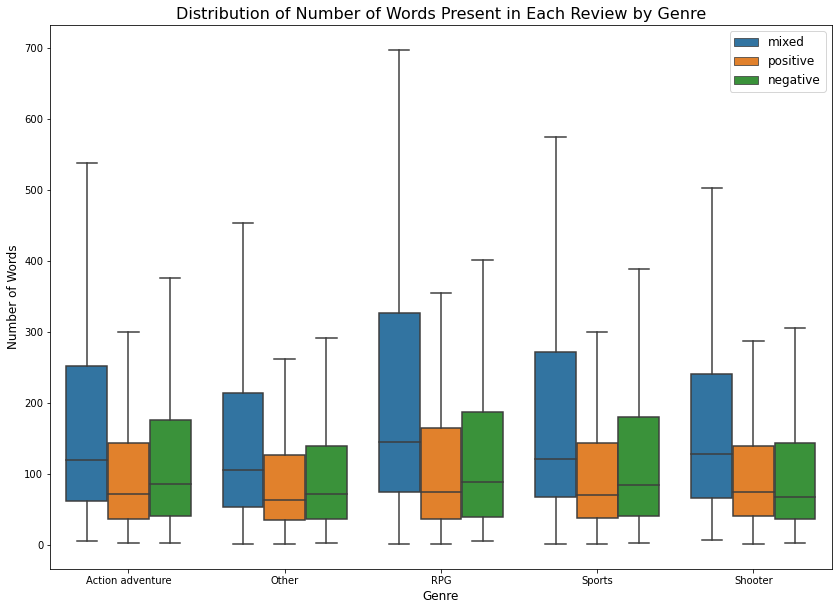

In [7]:
# Plot the distribution of number of words by user score for each game genre
plt.figure(figsize=(14,10))
ax = sns.boxplot(x='genre', y='number_of_words', hue='usersentiment', data=df, showfliers=False)
ax.set_title('Distribution of Number of Words Present in Each Review by Genre', fontsize=16)
plt.legend(fontsize='large')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.show()

In [8]:
# Initialize a list of the game genres
genres = df.genre.value_counts().index

# Loop over the genres and perform an ANOVA test to check for statistical signficant findings
for genre in genres:
    pos = df.loc[df['genre'] == genre, 'number_of_words'][df.usersentiment == 'positive'].values
    mix = df.loc[df['genre'] == genre, 'number_of_words'][df.usersentiment == 'mixed'].values
    neg = df.loc[df['genre'] == genre, 'number_of_words'][df.usersentiment == 'negative'].values

    stat, p = ss.f_oneway(pos, mix, neg) 
    
    if p < 0.05: #using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between length of reviews and user scores in the", genre, " genre.\nP-value:{p}.\n".format(p =p))
    else:
        print("Theer is not a statistically significant difference among user scores and the length of their reviews for the", genre, "genre.")
        print('P-value:',p,'\n')

There is a statistically significant difference between length of reviews and user scores in the Other  genre.
P-value:8.196101560237771e-29.

There is a statistically significant difference between length of reviews and user scores in the Action adventure  genre.
P-value:1.056337295809172e-33.

There is a statistically significant difference between length of reviews and user scores in the RPG  genre.
P-value:1.4022801910230443e-27.

There is a statistically significant difference between length of reviews and user scores in the Shooter  genre.
P-value:6.910435813462124e-21.

There is a statistically significant difference between length of reviews and user scores in the Sports  genre.
P-value:8.393741539386122e-14.



***
> On average reviews where the user had mixed feelings about a game, encompass the most words among all reviews. This could be due to the gamer expressing what he enjoyed in the game and what he disliked. Using more words allows reviews with mixed feelings toward a game vividly expressed why they were experienced conflicting emotions. <br><br>
>For all genres except shooter games, positive reviews were generally the shortest type of reviews with the average positive review having somewhere between 70 and 90 words. One can imagine these reviews highlight the best features of the game and short summaries as to why the game was so enjoyable. The negative reviews may have been written in similar fashion. Perhaps accounting for the larger number of word usage, with additional excerpts explaining how the game could be improved.
***

### What are the most common words in game reviews by genre?

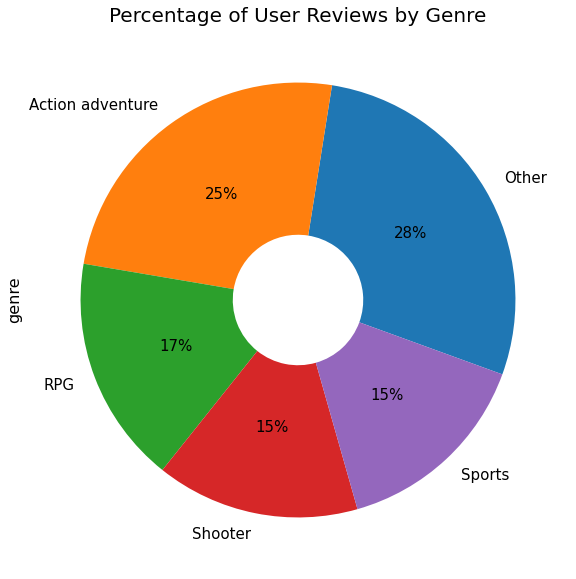

In [9]:
# Plot distribution of user reviews by genre as a pie chart
plt.figure(figsize=(20,10))
plt.title("Percentage of User Reviews by Genre", fontsize=20)
plt.ylabel('Genre',fontsize=16)
df.genre.value_counts().plot(kind='pie', labels=['Other','Action adventure','RPG','Shooter','Sports'],
                                     wedgeprops=dict(width=.7), autopct='%1.0f%%',
                                     startangle= -20, textprops={'fontsize': 15})

Reviews for genres other than action adventure, role-playing games, shooters and sports account for the majority of the reviews consisting of 28% of the data. The aforementioned genres do not trail far behind with a healthy amount of representation for each.

In [10]:
# Initialize a series called review containing the cleaned reviews
reviews = df.clean_text

# Instantiate the BOW vectorizer
cv = CountVectorizer(max_features=200, min_df=1000, max_df=0.75)

# Fit and transform the reviews, then make them to a dataframe
bow = cv.fit_transform(reviews)
reviewsBOW = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())

In [11]:
# Concatenate the BOW reviews with their genre
genreBOW = pd.concat([df.genre, reviewsBOW], axis=1)

# Create a list containing all words generated by the BOW vectorizer
words_col = list(genreBOW.columns)
words_col.remove('genre')

# Pivot the genre and BOW's to find the count of each word present in reviews by their game genre
data = pd.pivot_table(genreBOW, index='genre', values=words_col, aggfunc=np.sum)
#data.head()

In [12]:
# Transpose the pivoted data to facilitate looping over it and extracting the top words
data = data.T

# Create a dictionary of the top 50 words present in each review by genre
top_words_dict = {}
for col in data.columns:
    top = data[col].sort_values(ascending=False).head(50)
    top_words_dict[col] = list(zip(top.index, top.values))

In [13]:
# Print the top 15 words present in game reviews by genre
for genre, words in top_words_dict.items():
    print(genre)
    print(','.join([word for word, count in words[:14]]), '\n')

Action adventure
not,like,story,game,one,time,good,get,really,play,character,no,fun,great 

Other
not,like,game,play,one,time,story,get,character,really,good,great,fun,no 

RPG
not,like,story,character,one,time,get,good,game,no,really,play,great,combat 

Shooter
not,like,play,one,get,fun,time,game,good,no,really,story,feel,great 

Sports
not,like,play,player,mode,no,get,time,game,year,one,even,good,make 



All reviews by genre contain 'not', 'like', 'play', etc. To paint a clearer picture of what users really enjoyed/disliked about certain game genres, words common in more than 3 genres are added to the stop word list for EDA.

In [14]:
# Look at the most common top words and add them to stop words list
# Retrieve all 50 words present in reviews for each genre
words = []
for col in data.columns:
    top = [word for (word, count) in top_words_dict[col]]
    for t in top:
        words.append(t)

# If a word is present in more than 3 genres it is considered a genre review specific stop word
genre_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
#genre_stop_words

In [15]:
# Add new stop words
stop_words = stopwords.words('english')
stop_words.extend(genre_stop_words)
# Include other words that add no value
stop_words.extend(['video','game','de','le'])

# Recreate bag of words for reviews and pivot data by genre
cv = CountVectorizer(max_features=200, min_df=1000, max_df=0.75, stop_words=stop_words)
bow = cv.fit_transform(reviews)
reviewsBOW = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names())
genreBOW = pd.concat([df.genre, reviewsBOW], axis=1)
words_col = list(genreBOW.columns)
words_col.remove('genre')
data = pd.pivot_table(genreBOW, index='genre', values=words_col, aggfunc=np.sum).T

In [16]:
# Explore the top words without genre specific stop words
top_words_dict = {}
for col in data.columns:
    top = data[col].sort_values(ascending=False).head(50)
    top_words_dict[col] = list(zip(top.index, top.values))
    
#top_words_dict

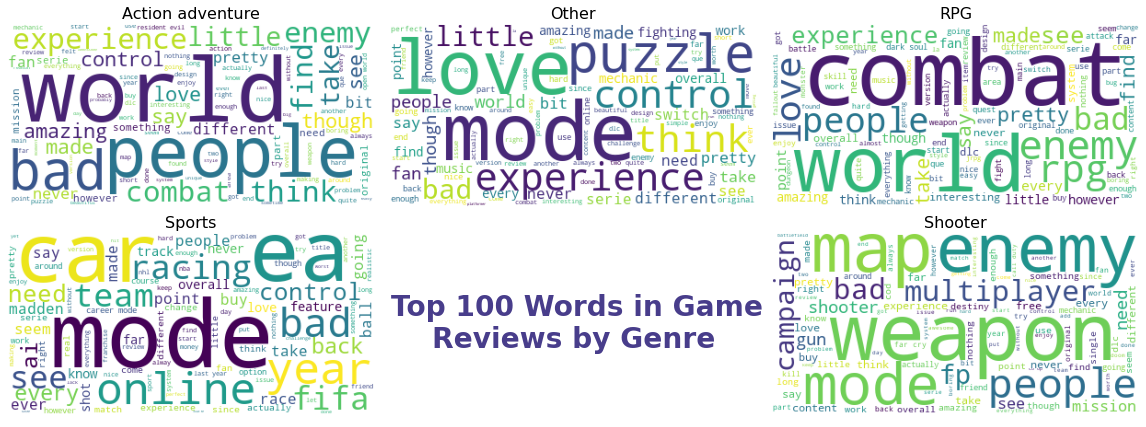

In [17]:
# Initialize wordcloud object
wc = WordCloud(stopwords=stop_words, background_color='white', random_state=1, max_words=100)

# Seperate documents by genre
genreReviews = {}
for g in pd.unique(df.genre):
    genreReviews[g] = ' '.join(df[df.genre == g].clean_text)

# Loop over genre and reviews to create word clouds for each
plt.rcParams['figure.figsize'] = [16, 6]
idx = 1

# Create iterator objects for subplot
genre = iter(genreReviews.keys())
reviews = iter(genreReviews.values())

# Create a subplot for each genre's word cloud
for i in range(1,7):
    if i == 5:
        plt.subplot(2,3,i)
        plt.text(0.005, 0.55, 'Top 100 Words in Game', fontsize=28, fontweight='bold', color='darkslateblue')
        plt.text(0.115, 0.385, 'Reviews by Genre', fontsize=28, fontweight='bold', color='darkslateblue')
        plt.axis("off")
        plt.tight_layout(pad=1)
    else:
        wc.generate(next(reviews))        
        plt.subplot(2,3,i)
        plt.imshow(wc) 
        plt.axis("off") 
        plt.tight_layout(pad = 1)
        plt.title(next(genre), fontsize=16)

plt.show()

***
>'World' seemed to be the most common subject in action adventure reviews. 'People' is also mentioned but it is not clear what the context may be. There are many descriptive words in the cloud with the largest being the word 'bad'. <br><br>
>In other genres reviews mentioned 'mode' the most probably referring to vast game modes presented in other game genres. The 'puzzle' games genre may seem to be the one these reviews are mainly about. Different words that may suggest thought provoking obstacles are present in this cloud. <br><br>
>'Combat' is the most prominent topic in RPG reviews, along with 'world' and 'enemy'. These attributes are common in RPG games and are probably what users enjoy the most about them. The word 'pretty' stands out, most likely in reference to the scenery typical of RPG games. <br><br>
>Sport game reviews have 'mode' as the most common word, maybe due to the different number of game modes sport games offer. Racing games were considered as the sport genre in this project and explains why 'car' is a common word. 'Year' makes sense as new iterations of sport games series particularly develped by EA come out each year. <br><br>
>Not surprisingly 'weapon' is the most common word in shooter games. Other topics that were common throughout reviews were 'map'. 'enemy', 'people' and 'multiplayer'. These words could be in reference to the online multiplayer shooter games are known for.
***

### Which topics were most present among reviews by game genre?

In [18]:
# The following code was edited for this project, retrieved from https://stackabuse.com/python-for-nlp-topic-modeling/
from sklearn.decomposition import LatentDirichletAllocation

# Loop over all genres to extract top 5 topics in each
for genre in genres:
    # Create the TFIDF vectorizer for the corpus
    tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=200, max_df=0.75, min_df=300, stop_words=stop_words).fit(df[df.genre == genre]['clean_text'])
    # Transform the reviews in specific genre with the TFIDF vectorizer
    tfidf_txt = tfidf.transform(df[df.genre == genre]['clean_text'])
    
    # Intialize an LDA model for topic modeling and fit it to genre data
    LDA = LatentDirichletAllocation(n_components=3, random_state=1)
    LDA.fit(tfidf_txt.toarray())
    
    print('The following are the 3 topics most common among user reviews for the', genre.lower(), 'genre: \n')
    # Loop over top topics in each genre and print them out
    for i,topic in enumerate(LDA.components_):
        print(f'\t - Top 10 words for topic #{i+1}:')
        print('\t\t >', [tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n\n')

The following are the 3 topics most common among user reviews for the other genre: 

	 - Top 10 words for topic #1:
		 > ['little', 'free', 'interesting', 'got', 'experience', 'short', 'beautiful', 'world', 'music', 'puzzle']
	 - Top 10 words for topic #2:
		 > ['control', 'must', 'worth', 'money', 'perfect', 'price', 'version', 'buy', 'amazing', 'switch']
	 - Top 10 words for topic #3:
		 > ['old', 'combat', 'different', 'bad', 'series', 'online', 'love', 'fighting', 'fan', 'mode']



The following are the 3 topics most common among user reviews for the action adventure genre: 

	 - Top 10 words for topic #1:
		 > ['mode', 'enemy', 'open', 'buy', 'need', 'action', 'combat', 'mission', 'world', 'bad']
	 - Top 10 words for topic #2:
		 > ['music', 'style', 'pretty', 'overall', 'amazing', 'worth', 'nice', 'control', 'little', 'bit']
	 - Top 10 words for topic #3:
		 > ['back', 'since', 'boring', 'beautiful', 'made', 'know', 'original', 'year', 'fan', 'love']



The following are the 3 to

***
>Word clouds helped distinguishing the most common words, but they do not provide any context behind what the users were actually trying to convey. To overcome that issue a Latent Dirichlet Allocation (LDA) model was used to find the top 5 topics among reviews by genre. The model was fitted to the TFIDF generated terms from all reviews and used to cluster words in reviews by genre.<br><br>
>Two of the topics in other game genres allude to specific lesser known game genres, puzzle and fighting games. The other topic speaks of how reviewers generally thought games in other genres are have good features and think they are worth the purchase.<br><br>
>For action adventure games the primary topic consists of many of the games features followed by bad, could be representing that gamers thought in game features could have been better. However, there are positive remarks towards the games style, controls, and music in the second top topic.<br><br>
>All three topics in RPG games have positive sentiment towards features within the game. It is apparent these type of games were received well by the average gamer in the sample set.<br><br>
>The top topic in the shooter genre alludes to the year the game was developed and a lack of a feature whether it be the world, enemies or experience. The other two topic speak to things common in shooter games such as their campaign, multiplayer modes and weapons coupled with a few words that depict the reviewers sentiment.<br><br>
>The primary topic in sport games seems to be about a dissatisfaction with the controls and AI players in the game. Followed by topics about common aspects of sport games such as the teams, fans, racing, year, and people.
***